# 1) Import clean dataset


In [1]:
import numpy as np
import pandas as pd
import missingno
import re
from src.funciones import *
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output/clean.csv', encoding='latin-1')

In [3]:
df=df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,Month,Decade,Type,Country,Area,Location,Activity,Fatal,Time
0,Jun-Aug,2010,Boating,USA,California,"Oceanside, San Diego County",unknown,N,18-22
1,Jun-Aug,2010,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",low water,N,12-17
2,Jun-Aug,2010,Invalid,USA,Hawaii,"Habush, Oahu",sports table,N,7-11
3,Jun-Aug,2010,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,sports table,N,unknown
4,Jun-Aug,2010,Provoked,MEXICO,Colima,La Ticla,underwater,N,unknown


# 2) Analysis

The questions we wanted to analyse were the following:  

- In which **month frame** are there more **shark attacks** per **country**?
- At what **time of the day** are there more **shark attacks** per **country**?
- Which **activity** provokes more **fatal injuries** per **country**?

As we advance through the analysis it is likely that new questions may arise. These will be covered in section 3.

## 2.1) In which season are there more shark attacks per country?

In [5]:
#print(plt.style.available)
plt.style.use('bmh')

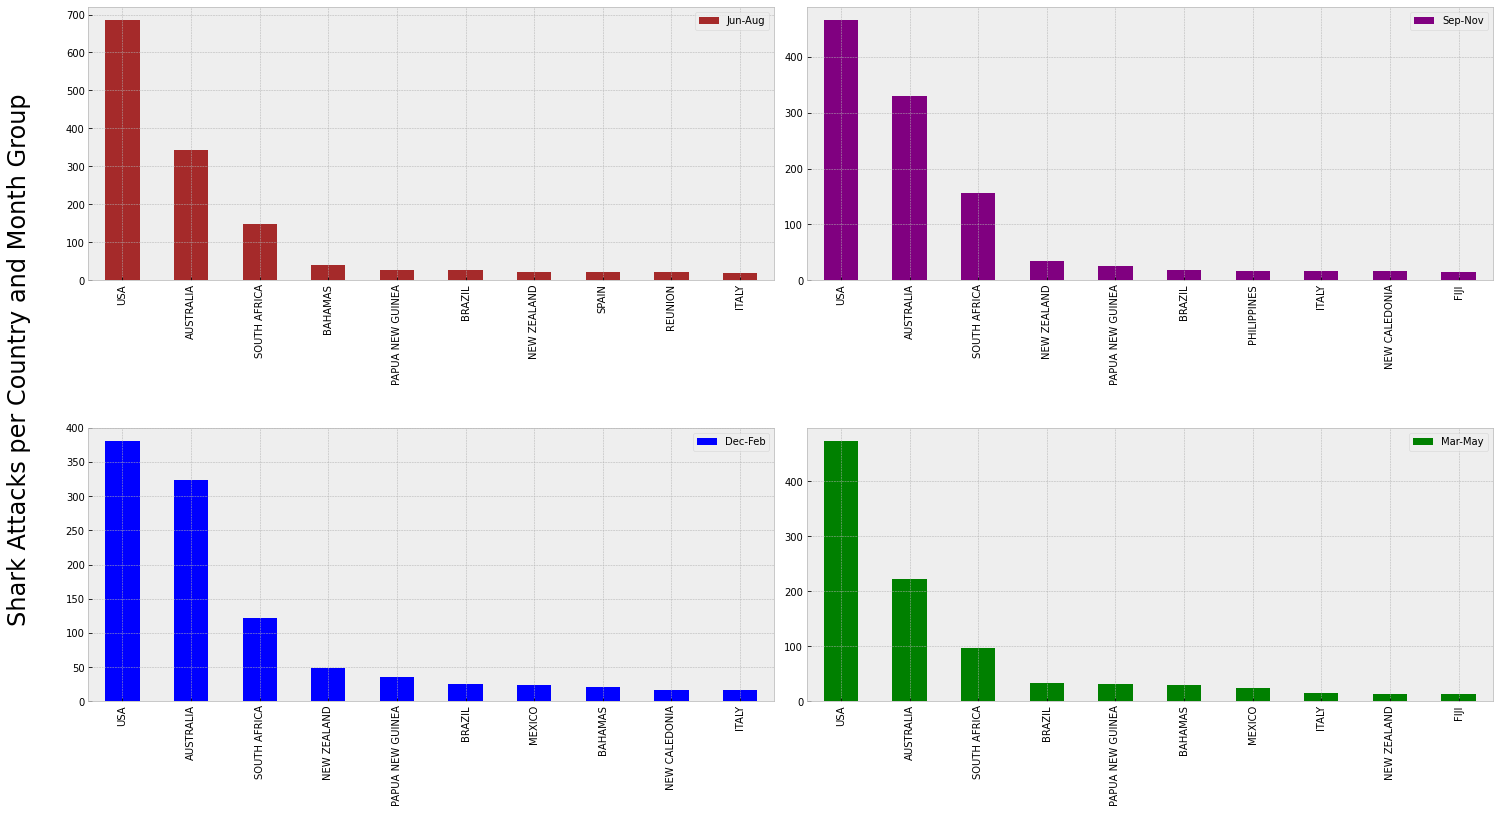

In [6]:
#Parameters for Function
sub_df= df.groupby(["Month","Country"]).size().reset_index(name='counts')
names=['Jun-Aug','Sep-Nov','Dec-Feb','Mar-May']
colors=['brown','purple','blue','green']
title='Shark Attacks per Country and Month Group'
cells=(2,2)

#Call function 
plot_graph_mat(sub_df, names, colors, title, rows=cells[0], cols=cells[1], typeplot='Month')

In the light of the results, `USA`, `AUSTRALIA` and `SOUTH AFRICA` are the countries which register the highest number of shark attacks regardless the Month group. On the other hand, those countries located in the Northern Hemisphere count with higher number of shark attacks during Jun-Aug (summer season in the Northern Hemisphere), whereas those located in the Southern Hemisphere present higher number of shark attacks at Dec-Feb (summer season in the Southern Hemisphere). 

## 2.2) At what time of the day are there more shark attacks per country?

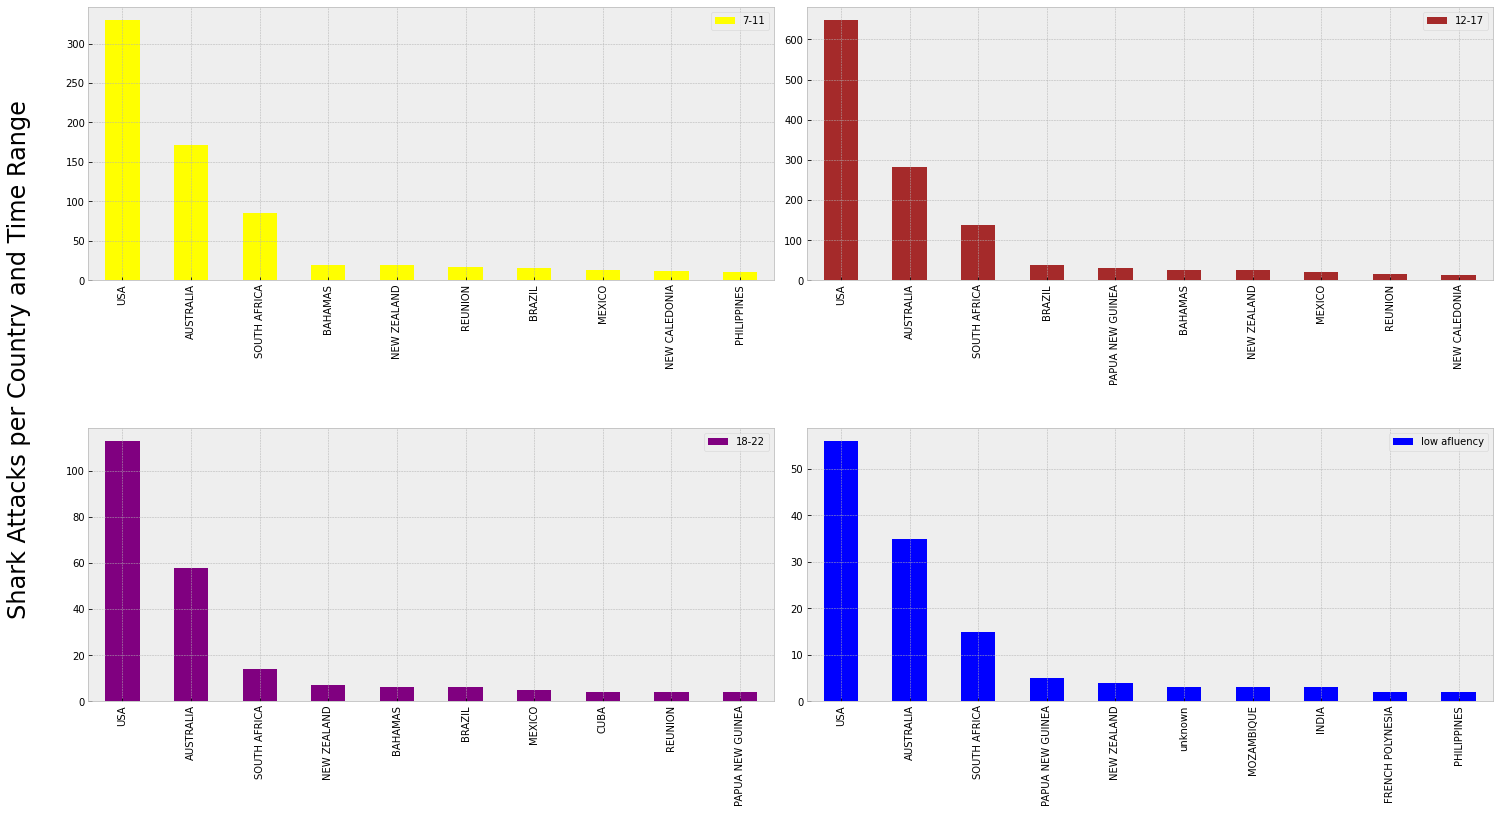

In [7]:
#Parameters for Function
sub_df = df.groupby(["Time","Country"]).size().reset_index(name='counts')
names=['7-11','12-17','18-22','low afluency']
colors=['yellow','brown','purple','blue']
title='Shark Attacks per Country and Time Range'
cells=(2,2)

#Call function 
plot_graph_mat(sub_df, names, colors, title, rows=cells[0], cols=cells[1], typeplot="Time")

It seems that `USA`,`AUSTRALIA` and `SOUTH AFRICA` are the countries which register the highest number of shark attacks regardless the Time Range in a day. For this case, all these countries present the highest number of shark attacks in the afternoon between 12 and 17 pm. Other questions may arise from this analysis:

- Which areas have more shark attacks in USA and Australia?
- Which locations have more shark attacks in Florida and New South Wales?

These will be answered in `Section 3 further analysis`. 

## 2.3) Which activity provokes more fatal injuries per country?

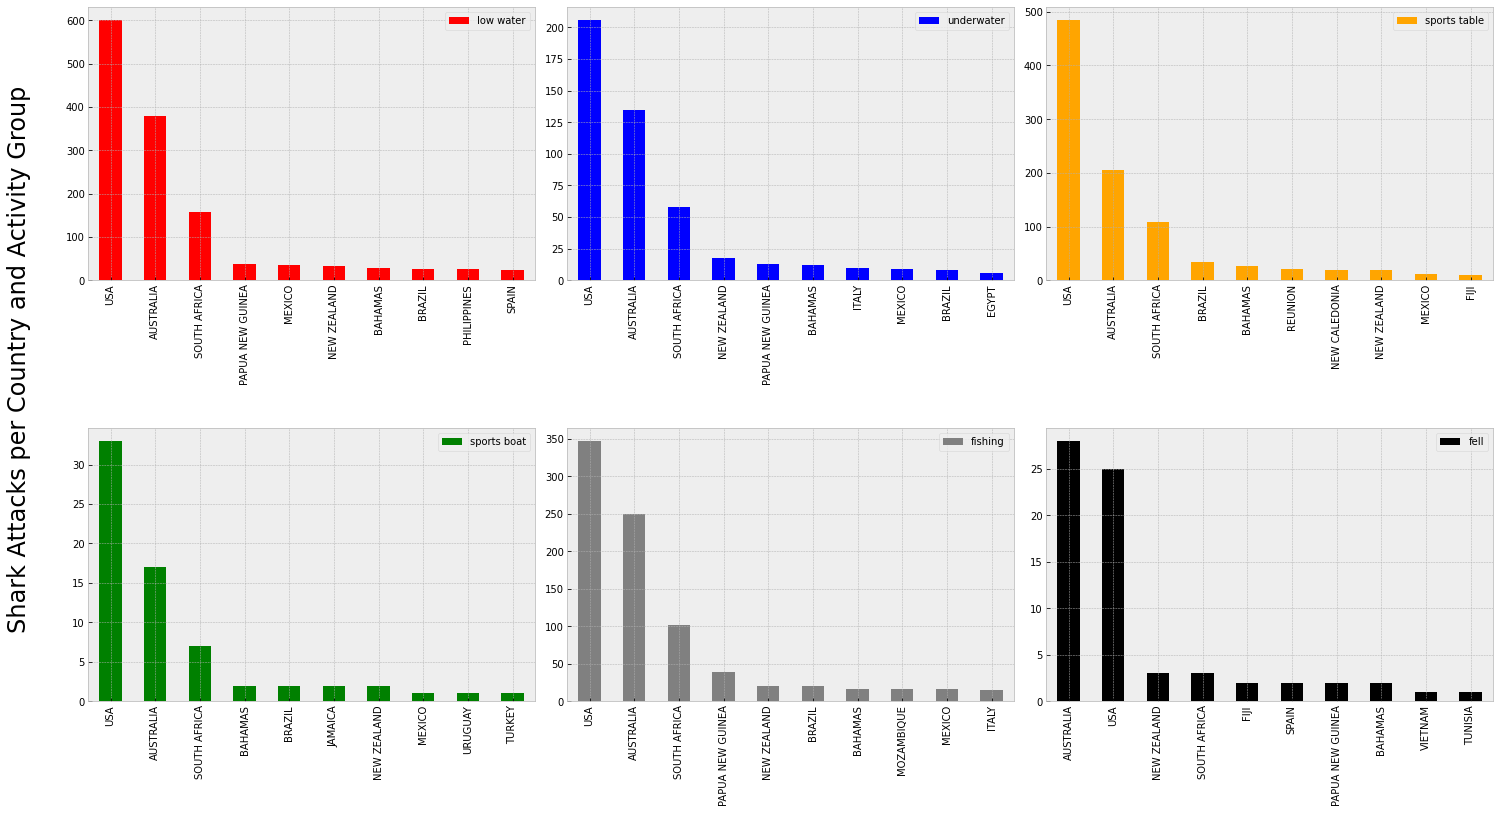

In [8]:
#Parameters for Function
sub_df= df.groupby(["Activity","Country"]).size().reset_index(name='counts')
names=['low water','underwater','sports table','sports boat','fishing','fell']
colors=['red','blue','orange','green','grey','black']
title='Shark Attacks per Country and Activity Group'
cells=(2,3)

#Call function 
plot_graph_mat(sub_df, names, colors, title, rows=cells[0], cols=cells[1], typeplot='Activity')

Surprisingly, low water activities (Swimming, Bathing, Floating, Body-boarding, Body-surfing, Treading Water, Wading, Standing, Walking) seem to be more dangerous in the matter of shark attacks. Moreover, watersports with table (Surfing, Surf-skiing, Windsurfing, Boogie-boarding) follow closely behind low water activities. From these results, other questions may arise from this analysis:

- Which activities produce more fatal injuries?
- Why sharks attack in low water activities?

These will be answered in `Section 3 further analysis`. 

# 3) Further Analysis

## 3.1) Which areas have more shark attacks in USA and Australia?

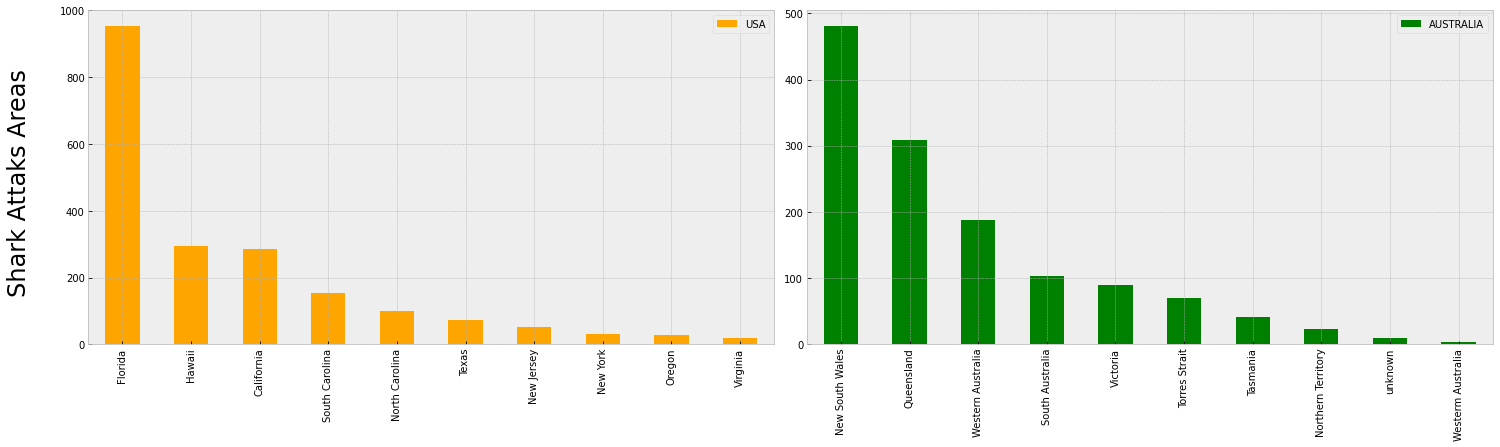

In [9]:
#Parameters for Function
sub_df= df.groupby(["Area","Country"]).size().reset_index(name='counts')
names=['USA','AUSTRALIA']
colors=['orange', 'green']
title='Shark Attaks Areas'

#Call function 
plot_graph_lin(sub_df, names, colors, title, rows=1, cols=2, typeplot='Country', fsize=(20, 5), xaxes="Area")

Inside United States, `Florida`, `Hawaii` and `California` are the Areas with highest number of shark attacks. In the case of Australia, the most affected areas are `New South Wales` and `Queensland`. These places are a surf hub known for its beaches. The number of human-shark interactions is strongly correlated with time spent by humans in the sea. As interest in outdoor aquatic recreational activities increases, the incidence of shark attacks is expected to rise. Let's deep a bit more on which locations inside Florida and New South Wales there are more shark attaks.

##  3.2) Which locations have more shark attacks in Florida and New South Wales?

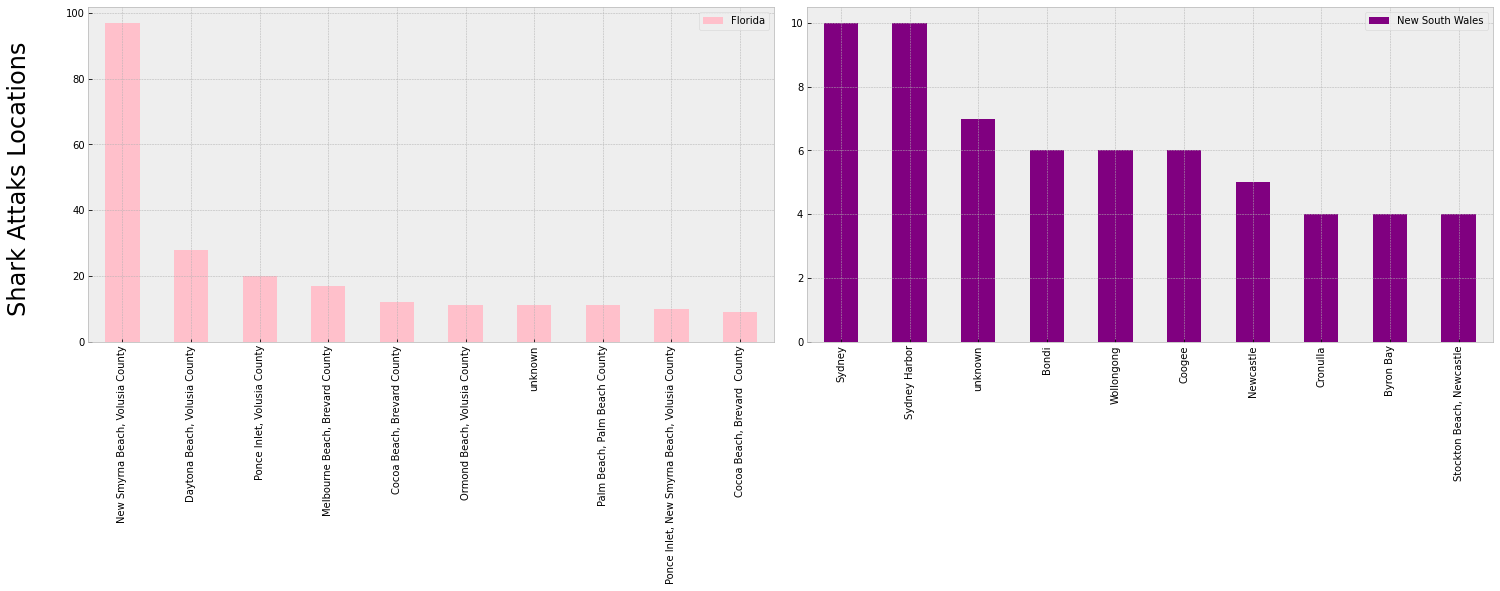

In [10]:
#Parameters for Function
sub_df= df.groupby(["Location","Area"]).size().reset_index(name='counts')
names=['Florida','New South Wales']
colors=['pink', 'purple']
title='Shark Attaks Locations'

#Call function 
plot_graph_lin(sub_df, names, colors, title, rows=1, cols=2, typeplot='Area', fsize=(20, 5), xaxes="Location")

There we are! New Smyma Beach (USA) and Sydney (Australia) are the locations with highest number of shark attacks. Conclussion: If you don't want to get bit by a shark avoid wandering in New Smyrna Beach (Florida) between 12 and 5 in the Summer. [Bryan](https://www.surfline.com/surf-news/hurricane-matthew-passes-sharks-show-up-at-the-inlet-shark-attacks-surfer-in-new-smyrna-beach_142356/) was hit on the knee while surfing in this beach and, while there was a reasonable amount of blood, turns out he's fine!

## 3.3) Which activities produce more fatal injuries?

Text(0.5, 0, '%')

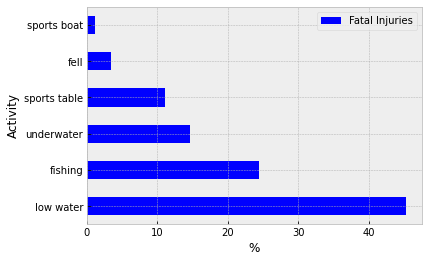

In [11]:
#Preparing dataset
sub_df = df.groupby(["Activity","Fatal"]).size().reset_index(name='counts')
df_aux= sub_df[["Activity","counts"]][sub_df["Fatal"]=='Y'].sort_values(by=['counts'], ascending=False).drop(index=33)
df_aux['counts']=df_aux['counts']/df_aux['counts'].sum()*100

#Plot
df_aux.plot.barh(x='Activity', y='counts', rot=0, label='Fatal Injuries', color='blue').xaxis.set_label_text("%")

A surfer in a wetsuit paddling on a board could be mistaken for sick or dead prey, floating on the water. The shark may give an exploratory bite to assess. Unfortunately such exploratory bites can remove substantial tissue and even limbs in humans, particularly if the shark is over two metres in length, and may thus be fatal. But it seems that most of the surfers scape from this fatal destiny. 

Shallow water activities lead the rank for fatal injuries. It seems sharks find people more approachable if they are swimming or walking in the beach. Shallow water seems like a strange place for a shark attack — they sometimes get so close to shore that they can barely move. Nevertheless, it seems that some species ([bull shark](https://www.cheatsheet.com/culture/why-sharks-attack-shallow-water.html/)) like to feed in murky, warm, shallow waters. The next questions arises, why do shark attack on low waters?

## 3.4) Why sharks attack in low water activities?

Text(0.5, 0, '%')

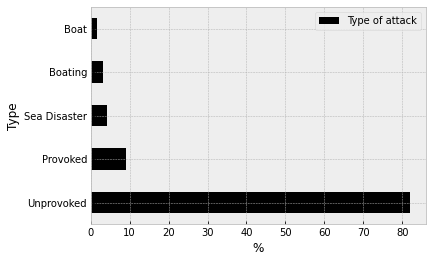

In [12]:
#Preparing dataset
sub_df = df.groupby(["Activity","Type"]).size().reset_index(name='counts')
df_aux= sub_df[["Type","counts"]][sub_df["Activity"]=='low water'].sort_values(by=['counts'], ascending=False).drop(index=14)
df_aux['counts']=df_aux['counts']/df_aux['counts'].sum()*100

#Plot
df_aux.plot.barh(x='Type', y='counts', rot=0, label='Type of attack', color='black').xaxis.set_label_text("%")

Most of attacks are unprovocked by the individual. According to [National Geographic](https://www.cheatsheet.com/culture/why-sharks-attack-shallow-water.html/), some sharks (bull sharks, great whites and tiger sharks) prefer the same swimming conditions as humans and are extremely **territorial**, being this the reason why most bull shark attacks are accidentally caused by the shark’s territorial habits. However, some scientists believe the sharks might also get curious, causing them to go after surfers and beach dwellers.